$\Huge Code$ $\hspace{0.1cm}$ $\Huge to$ $\hspace{0.1cm}$ $\Huge create$ $\hspace{0.1cm}$ $\Huge a$ $\hspace{0.1cm}$ $\Huge White$ $\hspace{0.1cm}$ $\Huge Noise$ $\hspace{0.1cm}$ $\Huge map$ $\hspace{0.1cm}$ $\Huge :$ 

# TO DO : 

# Modules :

In [33]:
%matplotlib inline
import numpy as np 
import healpy as hp
import matplotlib.pyplot as plt
import pysm as pysm
import ccatp_sky_model as sky
from matplotlib import rc
rc('text', usetex=True)

# Functions : 

## Compute pixel resolution : 

Geeting the size of an healpy pixel depending on the $N_{SIDE}$ of the map : 
The Healpy map is basically a sphere composed of a given number of pixels. The solid angle of tis sphere is 1.  Therefore we have that the surface of one pixel, is the surface of the sphere divided by the number of pixels : 

$S_{pix}= \frac{4\pi \times 1}{N_{pix}}$ and $N_{pix}=12\times N_{SIDE}^{2}$

Thefore the resolution of one pixel is the squarre root of the surface : 

$S_{pix}= \sqrt{\frac{4\pi \times 1}{N_{pix}}}$

now the solid angle is in radians, to put it in degree we multiply by $180/\pi$ and to put it in arcmin we multiply by $60$ as $1$ arcmin = $1/60$ of a degree. 

In [34]:
def px_size(nside,arcmin=True):   
            
    """
    Compute the size of Healpy pixels in function of the nside of the map.  
    Parameters
    ----------
    
    nside : int
        Nside, number of separation of the healpy blocks. 
    arcmin : bool
        if True return the size in arcmin, otherwise in radians. 
        
    Returns
    -------
    float
        The size of one healpy pixel. 
    """
    
    #Number of pixels : 
    N_pix = hp.pixelfunc.nside2npix(nside)
    
    #Compute the unit : 
    if arcmin == True :        
        multi=(180*60/np.pi)        
    else:        
        multi=1
        
    #Compute the resolution :     
    size = np.sqrt(((4*np.pi)/N_pix)*multi**2)

    return(size)

## Create a white noise map : 

In [35]:
def simulate_white_noise(freq, noise_level, nside_out = 4096, unit_noise = 1, arcmin = True, unit = 'cmb'): 
        
    """
    Function which create a White noise map for a given noise/arcmin or noise/radians. 
    By default the code expect the noise level to be given in microK_CMB/arcmin
    Parameters
    ----------
    freq: float or float array
        Frequency of the output map in Hz.
    noise_level : float 
        noise level desired in any units of micro K by radians or arcmin.
    nside_out: float
        Healpix nside parameter of the output map. Must be a valid value for nside.
        Default: 4096
    unit_noise : float 
        resolution of the noise, for exemple 1' or 1 radians. 
    arcmin : bool 
        if true mean that the noise is given in /arcmin. 
    unit: bool, optional
        Determines the units of the output map. The available units are 'mjy' --> MJy/sr
        (specific intensity), 'cmb' --> K_CMB (thermodynamic temperature), and 
        'rj' --> K_RJ (brightness temperature). Default: 'mjy'.
        
    Returns
    -------
    array
        Array contaning the Variarion of intensity produced by tSZ over the fequencies. 
    """
    
    #Compute the average noise in each pixel : 
    sigma_noise = (noise_level * unit_noise)/px_size(nside_out,arcmin)
        
    #Create White-noise map :
    npix = hp.pixelfunc.nside2npix(nside_out) #Compute the number of pixels
    noise_map =  np.random.normal(0, sigma_noise, npix)*1e-6 #Random normal distribution centered over the desired noise
    
    #Convert units if necessary
    if unit == "cmb":
        None
    elif unit == "mjy":
        noise_map = convert_units(freq, noise_map, cmb2mjy=True)
    elif unit == "rj":
        noise_map = convert_units(freq, noise_map, cmb2rj=True)
    else:
        print("Waring: Unknown unit! Output will be in K_CMB")
    
    return(np.float32(noise_map))

# Launch and display :

/users/mcharmetant/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


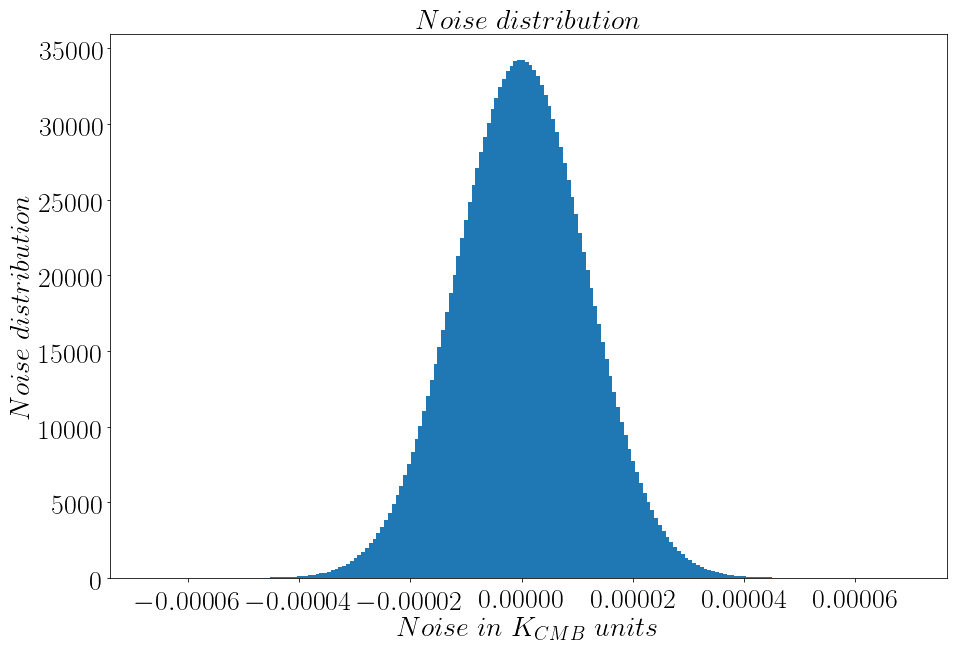

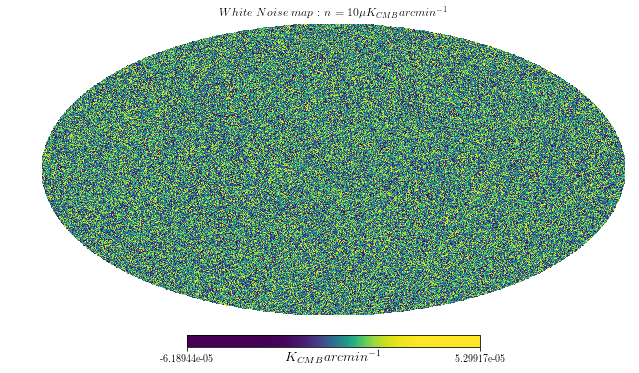

In [37]:
noise_map = simulate_white_noise(30e9, 10, nside_out = 4096, unit_noise = 1, arcmin = True,
                                 unit = 'cmb')

#Display and save the distribution: 
plt.hist(noise_map,200,normed=True) #Display histogram of the distribution
plt.title('$Noise$ $distribution$',fontsize=28)
plt.xlabel('$Noise$ $in$ $K_{CMB}$ $units$',fontsize=28)
plt.ylabel('$Noise$ $distribution$',fontsize=28)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.rcParams['figure.figsize'] = [15, 10]

#Display map The White noise map: 
hp.mollview(noise_map, title="$White$ $Noise$ $map$ $:$ $n= 10 \mu K_{CMB}arcmin^{-1}$", norm='hist',unit='$K_{CMB}arcmin^{-1}$')